# Lecture 5.2 Data I/O: xarray and Pandas

Sep 26, 2019

## 1. Announcements

### Homework Assignment for Week 5: 
Import your data into python using pandas, xarray, or some other method, do some analysis, make some plots and explain your methods and results. You will present this to the class next Tuesday in a powerpoint presentation (or similar), along with an introduction to your dataset. There should be about 5 slides, no more than 10, and your talk should last about 5 min, 8 min max including questions. Load this presentation before class into github and call it HW_5_yourname.

See grading rubric on github

## 2. Warm-up:

Code a function that calculates the volume of a cube, given the length of a side. Use this to plot how volume scales with length of a side. Label your plot.

In [15]:
# function to calculate volume of a cube given length of side.
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
def cube_vol(s):
    vol = s**3
    return vol, s

In [16]:
vol, side = cube_vol(4)


## 3. Lecture Examples:

* Importing text files (we have done this)
* File I/O and pandas intro (I/O means input and output)
* Introduction to xarray and plotting netcdf files 

### Text files

In [17]:
import numpy as np
import pandas as pd
ted = pd.read_csv('ted.csv')

### Spreadsheets

Many of your data sets will be in excel files. We use xarray for netcdf files, and you have just seen that this gave you consise and useful information about the content of the netcdf file. Xarray is built on pandas, which works similarly for spreadsheets.

Download this data file:

https://www.dataquest.io/blog/large_files/movies.xls


#### Load the file

In [18]:
%pwd

'C:\\Users\\ncu116\\OneDrive - The University of Texas-Rio Grande Valley\\FALL 2019\\Intro to Sci Computing\\Jupyter Notebooks'

In [19]:
ted = pd.read_csv('ted.csv')

In [20]:
ted2 = pd.read_csv('ted.csv')

In [21]:
ted.head()
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


#### Transfer the file to a numpy array

In [22]:
ted_numpy = ted.values

### Netcdf files

Goto https://www.hycom.org/

In [23]:
import xarray as xr # use xarray to open netcdf file

In [24]:
bathy = xr.open_dataset('depth_GOMu0.04_03i.nc', decode_times=False)

Note you can also modify a pandas data frame into an xarray dataset

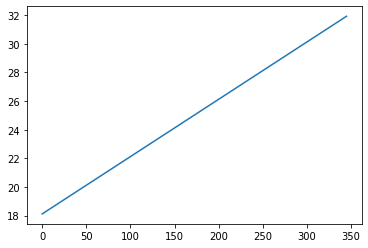

In [25]:
import matplotlib.pyplot as plt
plt.plot(bathy.Latitude)

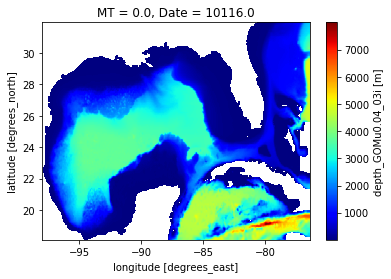

In [26]:
bathy.depth.plot(cmap='jet')


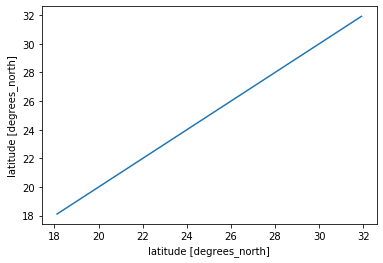

In [27]:
bathy.Latitude.plot() # easy way to plot

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 12.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * depth       (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
Data variables:
    surf_el     (time, lat, lon) float32 ...
    salinity    (time, depth, lat, lon) float32 ...
    water_temp  (time, depth, lat, lon) float32 ...
    water_u     (time, depth, lat, lon) float32 ...
    water_v     (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   a

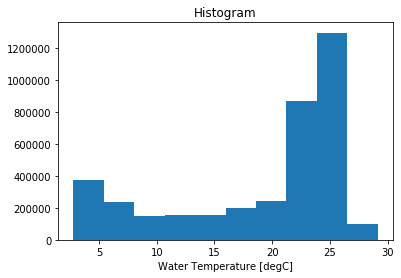

In [28]:
netcdf = xr.open_dataset('hycom_gomu_501_2000010100_t012.nc', decode_times=False)
netcdf.water_temp.plot()
netcdf

<xarray.DataArray 'depth' ()>
array(2000.)
Coordinates:
    depth    float64 2e+03
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

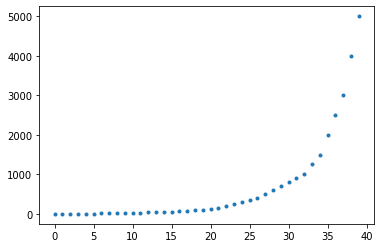

In [29]:
# exercise: plot the temperature at the surface and at a few
#netcdf.water_temp[0, 0, :, :].plot(cmap='magma')
test = netcdf.depth.values
plt.plot(test, '.')
netcdf.depth[35]

In [30]:
water_temp.plot?

Object `water_temp.plot` not found.


## 4. Lab:
    
We are doing a pandas tutorial: 

https://github.com/justmarkham/pycon-2019-tutorial
    
Use your headphones, go at your own pace. Remember to write text and comments as you go along. Finish this as homework if you don't complete in class. Note this requires you have a python environment on a non-lab computer, see me if assistance is needed on this.

## 1. Introduction to the dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'0.24.2'

In [32]:
ted = pd.read_csv('ted.csv')

In [33]:
ted.shape

(2550, 17)

In [34]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [35]:
ted.isna().sum() # number of missing values

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2 Exercise
which talks provoke the most online discussion

In [36]:
ted.sort_values('comments').tail() # biased for older videos, can normalize using views

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [37]:
ted['comments_per_view'] = ted.comments/ ted.views

In [38]:
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [39]:
# make this more interpretable by inverting the calculation
ted['views_per_comment'] = ted.views / ted.comments

In [40]:
ted.sort_values('views_per_comment').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.com/talks/francoise_mouly_the_...,839040,0.000004,279680.000000
2534,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,1504814438,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...","[{'id': 2511, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,0.000003,323087.000000


In [41]:
# interpretation : 1 out of every 450 people leave a comment
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


### Lessons: 
1. Consider the limitation and biases of your data when analyzing it
2. Make your results understandable

## 3. Visualize the distribution of comments

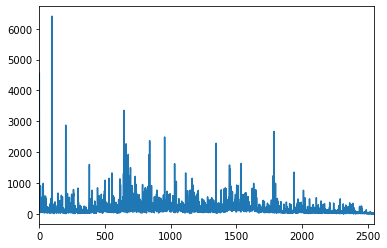

In [42]:
# line plot is not appropriate here (use it to measure something over time)
ted.comments.plot()

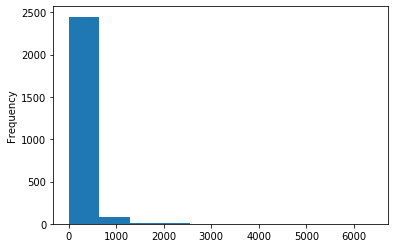

In [43]:
# histogram shows the frequency distribution of a single numeric variable
ted.comments.plot(kind='hist')

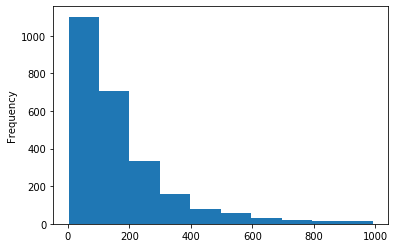

In [44]:
# more informative plot
ted[ted.comments < 1000].comments.plot(kind='hist') # using logical indexing

In [45]:
# check how many observations we removed from the plot
ted[ted.comments >= 1000].shape

(32, 19)

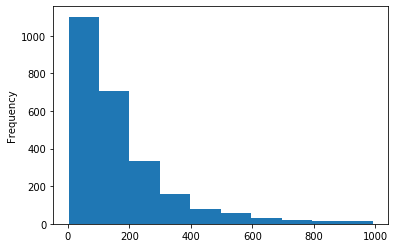

In [46]:
# also write it using the loc accessor
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

In [47]:
ted.loc[1,'name']

'Al Gore: Averting the climate crisis'

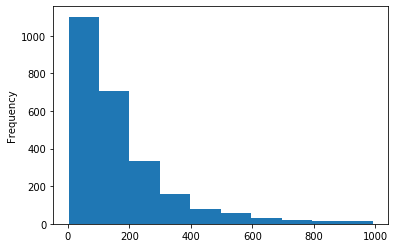

In [48]:
ted.query('comments < 1000').comments.plot(kind='hist')

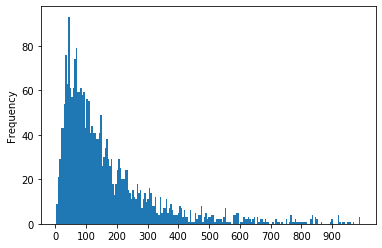

In [49]:
# increse the number of bins to see more detail
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=200)
plt.xticks(np.arange(0,1000, 100));

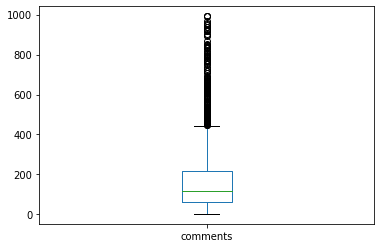

In [50]:
# boxplot can also show distributions, but its far less usedul for conetrated distributions becasue of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

### Lessons: 
1. choose your plot type based on the question you are answering and the data types(s) you are working with
2. use pandas one-liners to iterate through plots quickly
3. try modifying the plot defaults
4. creating plots involves decision-making 

## 4. Plot the number of talks that took place each year

In [51]:
ted['film_date_time'] = pd.to_datetime(ted.film_date, unit='s')

In [52]:
ted[['event', 'film_date_time']].sample(5)

,event,film_date_time
1481,TEDxCaltech,2013-01-18
991,TEDGlobal 2011,2011-07-11
501,TEDGlobal 2009,2009-07-23
161,TEDSalon 2007 Hot Science,2007-09-09
1365,TEDGlobal 2012,2012-06-28


In [53]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_date_time        datetime64[ns]
dtype: object

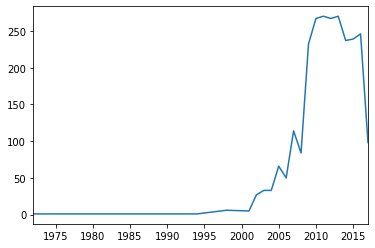

In [54]:
ted.film_date_time.dt.year.value_counts().sort_index().plot()

In [55]:
ted.film_date_time.max()

Timestamp('2017-08-27 00:00:00')

### Lessons
1. Read the documentation
2. use the datetime data type for date and times
3. check your work as you go
4. consider excluding data if it might not be relevant like 2017 in this case, or 1972 or non-ted talks

## 5. What were the best events in ted history to attend

In [56]:
ted.event.value_counts().head() # just a start about diversity of talks

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [57]:
# use views as proxy for ratings
ted.groupby('event').views.agg(['count', 'mean']).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [58]:
ted.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()


,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


### Lessons
1. Think creatively for how you use the data you have to answer questions, but acknowledge weaknesses
2. Watch out for small sample sizes

## 6. Unpack the ratings data

In [59]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [60]:
ted.loc[0, 'ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [61]:
# check the data types, it is a stringified list of dictionaries
type(ted.ratings[0])

str

In [62]:
import ast # abstract syntax tree

In [63]:
ast.literal_eval('[1, 2, 3]')

[1, 2, 3]

In [64]:
ast.literal_eval(ted.ratings[0]) # list of ratings for a single talk

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [65]:
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [66]:
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [67]:
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [68]:
type(ted.ratings_list[0])

list

In [69]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_date_time        datetime64[ns]
ratings_list                  object
dtype: object

## Lessons
1. Use apply any time it is necessary
2. pay attention to data type in pandas

## 7. Count the total number of ratings recieved by each talk and store in 'num_ratings'

In [70]:
# to start developing a complex function, start with smaller 
# functions that slowly build up to what you want to do. 
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count']
    return num

In [71]:
get_num_ratings(ted.ratings_list[0])

93850

In [72]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [73]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

## Lessons:
1. Write your code in small chunks, and check your work as you go. 
2. Lambda is best for functions

## 8. Which Occupations deliver the funniest on average?

In [74]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [77]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [78]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [79]:
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [80]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [81]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [84]:
ted.sort_values('funny_rate').speaker_occupation.tail(20)

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [85]:
# analyze the funny rate by occupation
# group_by
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [86]:
ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

In [88]:
## step 4: focus on well represented occupations
occupation_counts = ted.speaker_occupation.value_counts()

In [90]:
top_occupations = occupation_counts[occupation_counts >= 5].index

In [91]:
type(top_occupations)

pandas.core.indexes.base.Index

In [94]:
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [95]:
ted_top_occupations.shape

(786, 24)

In [101]:
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
Environmentalist, futurist                    0.007317
Violinist                                     0.009534
Singer-songwriter                             0.010597
Chemist                                       0.010970
Philanthropist                                0.012522
Activist                                      0.012539
Astrophysicist                                0.013147
Oceanographer                                 0.014596
Paleontologist                                0.015780
Social psychologist                           0.015887
Tech visionary                                0.016654
Sculptor                                      0.016960
Social Media Theorist                         